In [1]:
# Python code for connecting to MySQL database using mysql-connector-python

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with actual credentials
connection = mysql.connector.connect(
user='root',
password='root@root',
host='localhost',
database='Ecommerce'
    )

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
# After fetching data from the database, store it into a Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Printing the first 5 records from each table
print("Customer Data:")
print(customer_data.head())

print("\nProduct Data:")
print(product_data.head())

print("\nOrder Details Data:")
print(order_data.head())



Customer Data:
  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     John            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2. Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  

Product Data:
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics    

In [2]:
# Data Cleaning
# Check for missing values
print("Missing Values in Each Table:")
print("Customer Data:\n", customer_data.isnull().sum())
print("\nProduct Data:\n", product_data.isnull().sum())
print("\nOrder Details Data:\n", order_data.isnull().sum())

# Ensuring data types are appropriate
print("\nData Types in Each Table:")
print("Customer Data:\n", customer_data.dtypes)
print("\nProduct Data:\n", product_data.dtypes)
print("\nOrder Details Data:\n", order_data.dtypes)

# Handling outliers using IQR method (for numeric columns)
def handle_outliers(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\nOutliers in '{col}':")
        print(outliers)

print("\nHandling Outliers:")
print("Customer Data:")
handle_outliers(customer_data)

print("\nProduct Data:")
handle_outliers(product_data)

print("\nOrder Details Data:")
handle_outliers(order_data)


Missing Values in Each Table:
Customer Data:
 customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

Product Data:
 product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

Order Details Data:
 order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

Data Types in Each Table:
Customer Data:
 customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object

Product Data:
 product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object

Order Details Data:
 order_id                 int6

The total no. of customers city-wise:
 city
Berlin              1
Dubai               1
Kanagawa            1
Lake Buena Vista    1
London              1
Melbourne           1
Mumbai              1
New York            1
Paris               1
Rome                1
San Francisco       1
Singapore           1
Sydney              1
Tokyo               2
dtype: int64


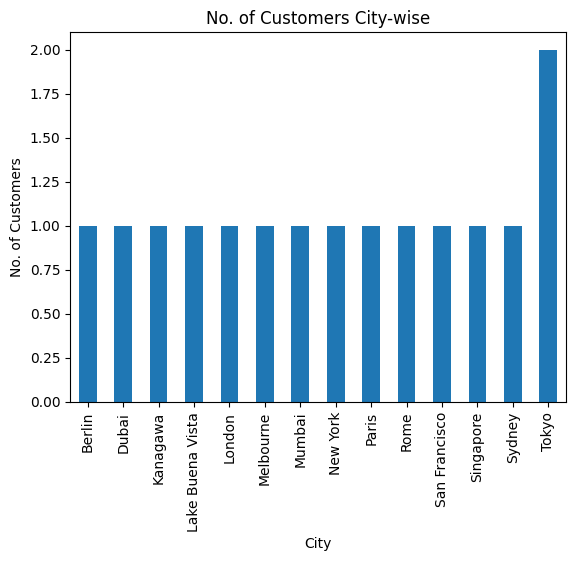

In [3]:
#Exploratory Data Analysis (EDA) and Visualization
#1.Customer Analysis:

#-- Identify the total number of customers City wise.

Customer_Count = customer_data.groupby('city').size()
print("The total no. of customers city-wise:\n", Customer_Count)
Customer_Count.plot(kind='bar', title='No. of Customers City-wise', width=0.5)
plt.xlabel('City')
plt.ylabel('No. of Customers')
plt.show()


Top Customers by Order Frequency:
   Customer ID  Order Count
0        C1001            1
1        C1002            1
2        C1003            1
3        C1004            1
4        C1005            1
5        C1006            1
6        C1007            1
7        C1008            1
8        C1009            1
9        C1010            1
10       C1011            1
11       C1012            1
12       C1013            1
13       C1014            1
14       C1015            1


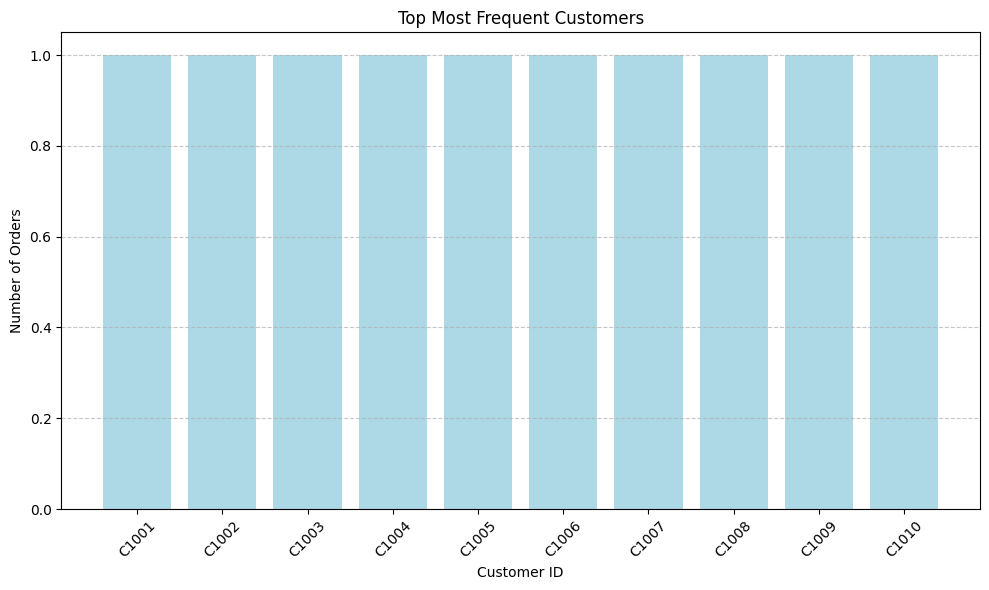

In [4]:
#Identify the most frequent customers based on their order history.
customer_order_counts = order_data['customer_id'].value_counts().reset_index()
customer_order_counts.columns = ['Customer ID', 'Order Count']
sorted_customers = customer_order_counts.sort_values(by='Order Count', ascending=False)

print("Top Customers by Order Frequency:")
print(sorted_customers)
plt.figure(figsize=(10, 6))
plt.bar(sorted_customers['Customer ID'][:10], sorted_customers['Order Count'][:10], color='lightblue')
plt.title('Top Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Total Products Count by Category:
category
Appliance      6
Electronics    8
furniture      1
dtype: int64


/var/folders/w_/ptt43dn5085698s3cb29nrr00000gn/T/ipykernel_55287/2999518294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_totals.index, y=category_totals.values, palette='plasma', width=0.3)


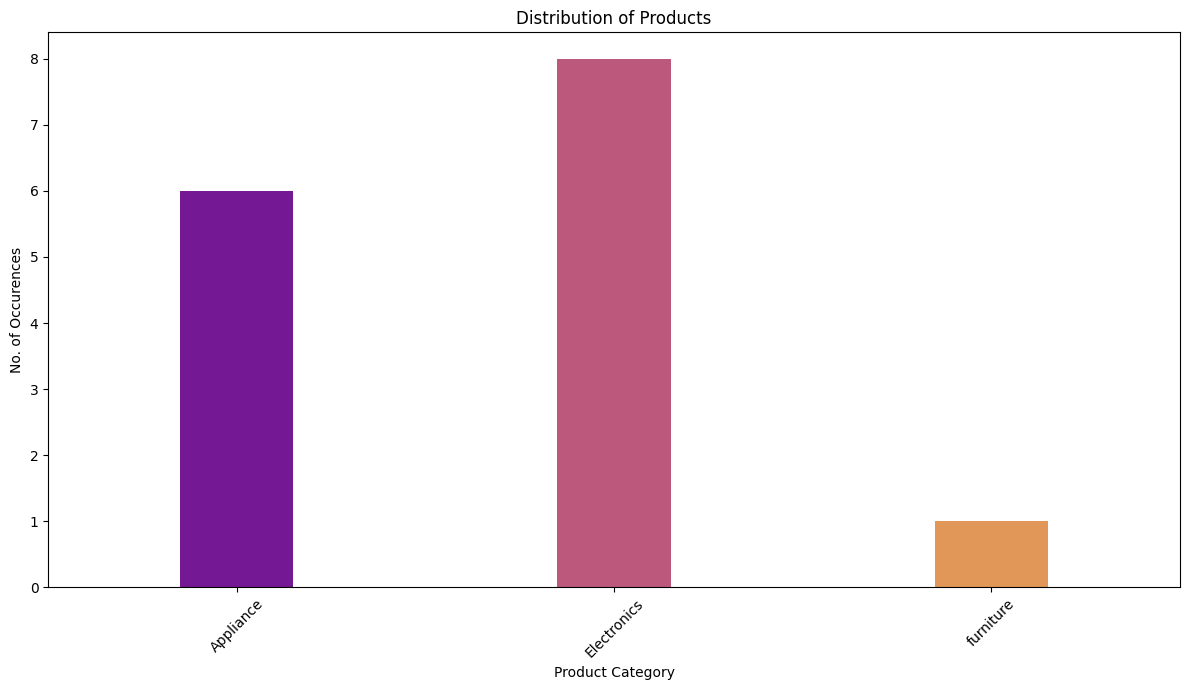

In [5]:
#● Product Analysis:
#○ Determine the total number of products available by category.
category_totals = product_data.groupby('category').size()

print("Total Products Count by Category:")
print(category_totals)

plt.figure(figsize=(12, 7))
sns.barplot(x=category_totals.index, y=category_totals.values, palette='plasma', width=0.3)
plt.title('Distribution of Products')
plt.xlabel('Product Category')
plt.ylabel('No. of Occurences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribution of Products Across Sub-Categories:
      Sub_Category  Product_Count
0  Home Appliances              4
1          Kitchen              3
2           Chairs              1
3         computer              1
4            phone              1
5      Electronics              1
6        Computers              1
7            Audio              1
8      Photography              1
9    Entertainment              1


/var/folders/w_/ptt43dn5085698s3cb29nrr00000gn/T/ipykernel_55287/3877860208.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub_Category', y='Product_Count', data=sub_category_distribution, palette='coolwarm', width=0.5)


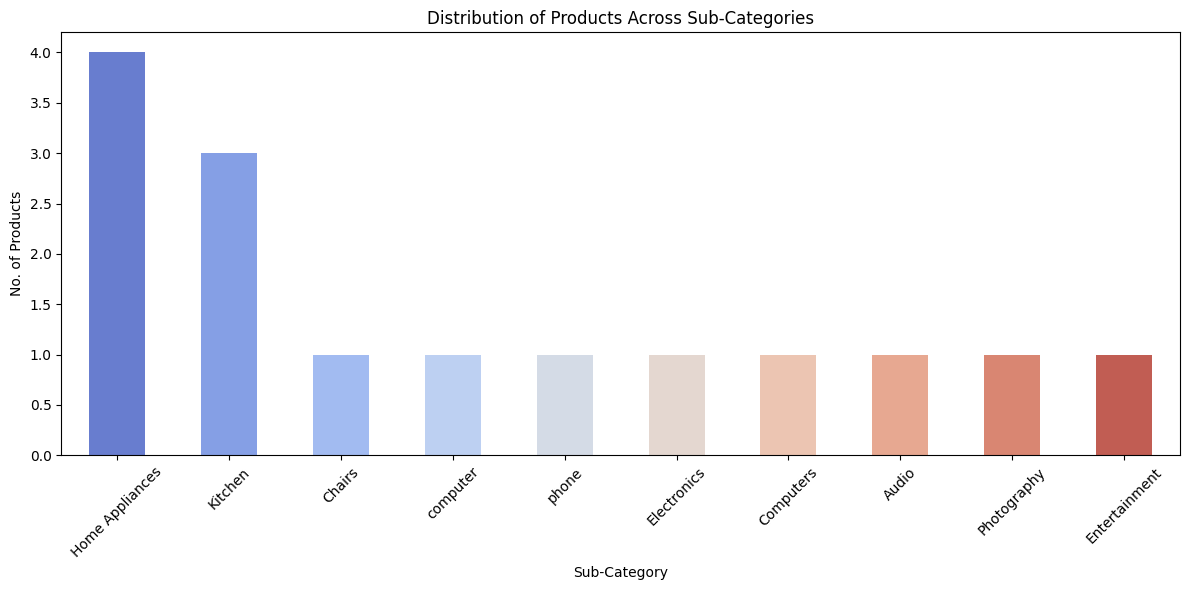

In [6]:
#Analyze the distribution of products across sub-categories.
sub_category_distribution = product_data['sub_category'].value_counts().reset_index()
sub_category_distribution.columns = ['Sub_Category', 'Product_Count']

print("Distribution of Products Across Sub-Categories:")
print(sub_category_distribution)

plt.figure(figsize=(12, 6))
sns.barplot(x='Sub_Category', y='Product_Count', data=sub_category_distribution, palette='coolwarm', width=0.5)

plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('No. of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Products with Low Stock:
   product_id     product_name     category     sub_category  original_price  \
0        P102            Chair    furniture           Chairs         20000.0   
2        P104       Smartphone  Electronics            phone         45000.0   
3        P105          Blender    Appliance      Electronics           500.0   
5        P107               TV  Electronics  Home Appliances         45000.0   
6        P108     Refrigerator    Appliance          Kitchen         35000.0   
7        P109  Washing Machine    Appliance  Home Appliances         25000.0   
8        P110        Microwave    Appliance          Kitchen          8000.0   
9        P111  Air Conditioner    Appliance  Home Appliances         50000.0   
11       P113      Camera Lens  Electronics      Photography         15000.0   
12       P114         Smart TV  Electronics  Home Appliances         60000.0   
13       P115   Gaming Console  Electronics    Entertainment         40000.0   

    selling_pr

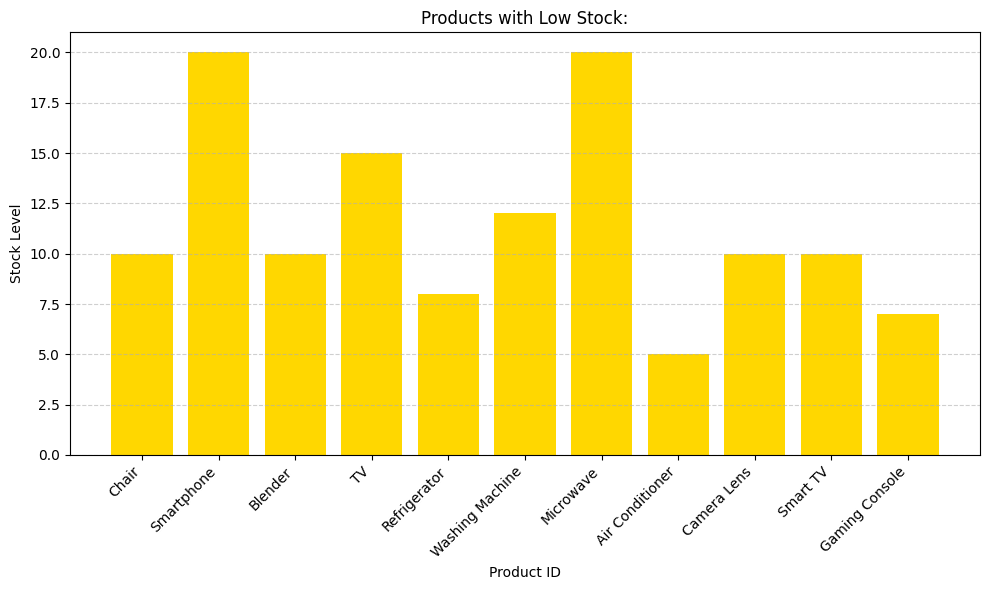

In [7]:
# Identify products with low stock levels

# Filtering products that have a stock level of 20 or less
low_stock_items = product_data[product_data['stock'] <= 20]

print("Products with Low Stock:")
print(low_stock_items)

if not low_stock_items.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(low_stock_items['product_name'], low_stock_items['stock'], color='gold')
    plt.title('Products with Low Stock:')
    plt.xlabel('Product ID')
    plt.ylabel('Stock Level')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("There are no products with low stock levels to display.")


The Average Price:- 29196.73 INR
The Maximum Price:- 55000.99 INR
The Minimum Price:- 450.00 INR


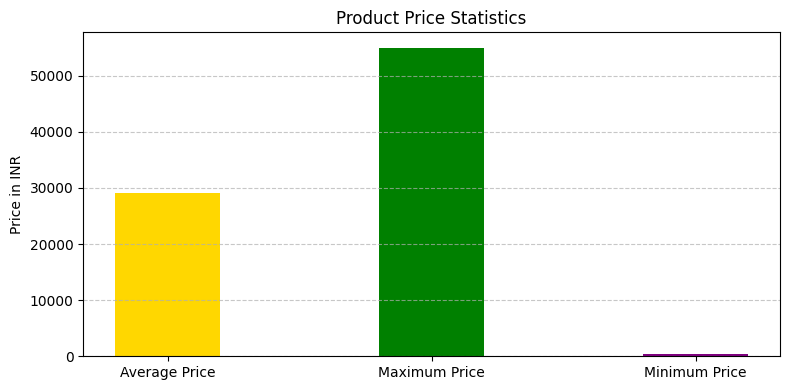

In [8]:
#Calculate the average, maximum, and minimum selling prices for products.
avg_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()

price_stats = {
    'Average Price': avg_price,
    'Maximum Price': max_price,
    'Minimum Price': min_price
}

print(f"The Average Price:- {avg_price:.2f} INR")
print(f"The Maximum Price:- {max_price:.2f} INR")
print(f"The Minimum Price:- {min_price:.2f} INR")

# Visualization using Matplotlib
plt.figure(figsize=(8, 4))
plt.bar(price_stats.keys(), price_stats.values(), color=['gold', 'green', 'purple'], width=0.4)
plt.title('Product Price Statistics')
plt.ylabel('Price in INR')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


Total Number of Orders Product-wise with Product Names
  product_id  quantity     product_name
0       P102       4.0            Chair
1       P105       3.0          Blender
2       P104       2.0       Smartphone
3       P109       2.0  Washing Machine
4       P113       2.0      Camera Lens
5       P103       1.0           Laptop
6       P106       1.0        Laptop HP
7       P107       1.0               TV
8       P108       1.0     Refrigerator
9       P110       1.0        Microwave


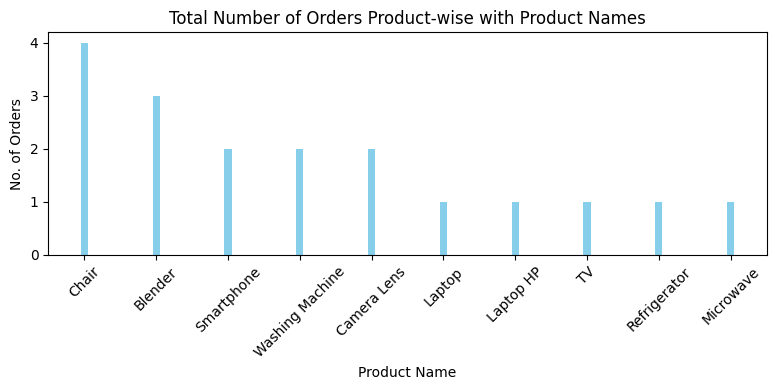

In [9]:
#● Order Analysis:
#○ Calculate the top 10 orders product wise.
# Top 10 orders product-wise
top_10_orders = order_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
top_10_orders_df = pd.merge(top_10_orders.reset_index(), product_data[['product_id', 'product_name']], on='product_id')
print("Total Number of Orders Product-wise with Product Names")
print(top_10_orders_df)

# Visualization: Top 10 orders product-wise
plt.figure(figsize=(8,4))
plt.bar(top_10_orders_df['product_name'], top_10_orders_df['quantity'], color='skyblue', width=0.1)
plt.xlabel('Product Name')
plt.ylabel('No. of Orders')
plt.title('Total Number of Orders Product-wise with Product Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


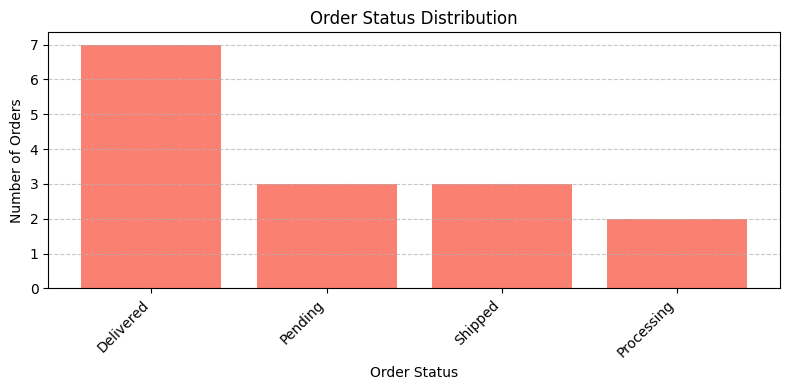

In [10]:
#Analyze the order status distribution (e.g., pending, delivered
order_status_counts = order_data['order_status'].value_counts()

order_statuses = order_status_counts.index.tolist()
order_counts = order_status_counts.values.tolist()

plt.figure(figsize=(8,4))
plt.bar(order_statuses, order_counts, color='salmon')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

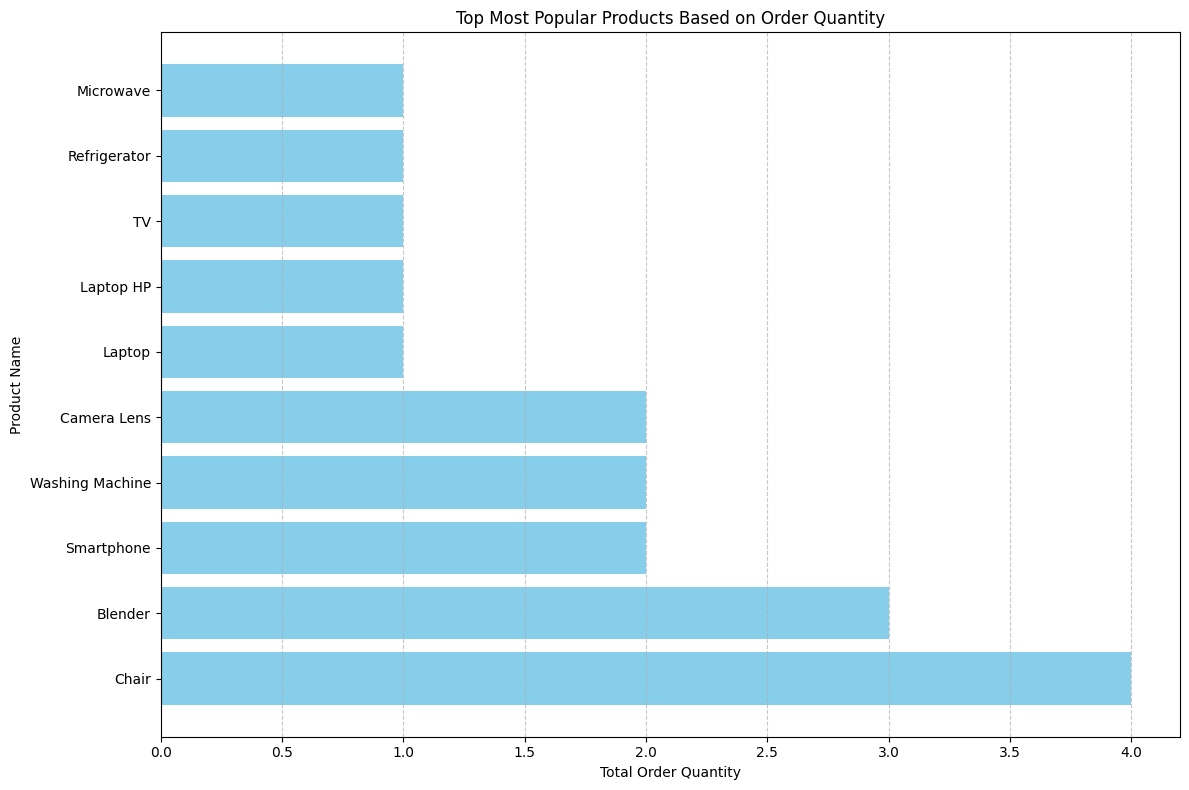

In [11]:
# ○ Identify the most popular products based on order quantity.
top_products = order_data.groupby('product_id')['quantity'].sum().nlargest(10).reset_index()
top_products_details = pd.merge(top_products, product_data[['product_id', 'product_name']], on='product_id')

product_names = top_products_details['product_name']
order_quantities = top_products_details['quantity']

plt.figure(figsize=(12, 8))
plt.barh(product_names, order_quantities, color='skyblue')
plt.title('Top Most Popular Products Based on Order Quantity')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


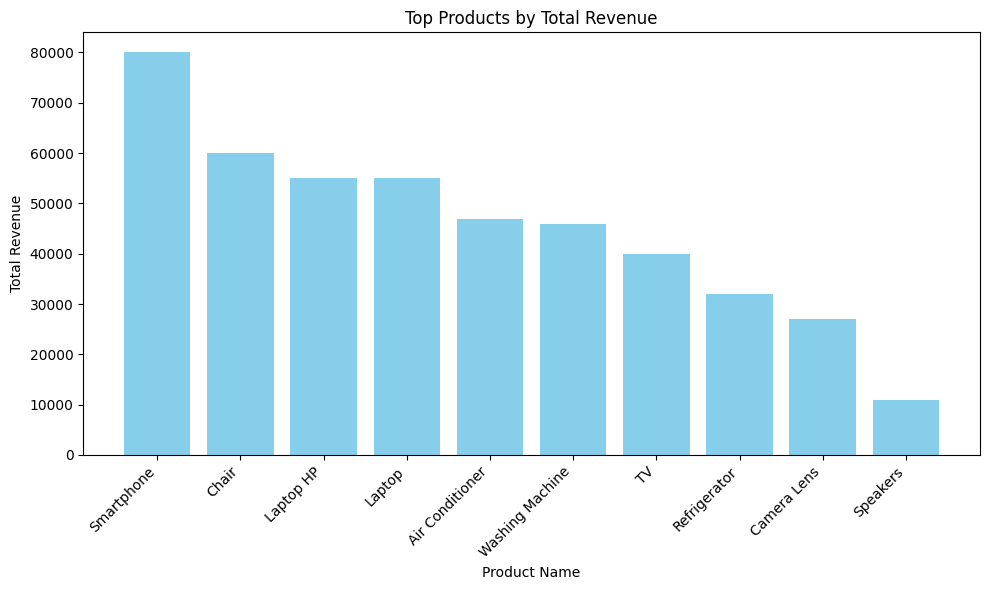

In [12]:
#● Sales Analysis:
#○ Calculate total revenue generated from orders product wise


revenue_data = pd.merge(order_data, product_data[['product_id', 'selling_price']], on='product_id')
revenue_data['total_revenue'] = revenue_data['quantity'] * revenue_data['selling_price']

top_revenue_products = revenue_data.groupby('product_id')['total_revenue'].sum().nlargest(10).reset_index()
top_revenue_products = pd.merge(top_revenue_products, product_data[['product_id', 'product_name']], on='product_id')

product_names = top_revenue_products['product_name']
revenues = top_revenue_products['total_revenue']

plt.figure(figsize=(10, 6))
plt.bar(product_names, revenues, color='skyblue')

plt.title('Top Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


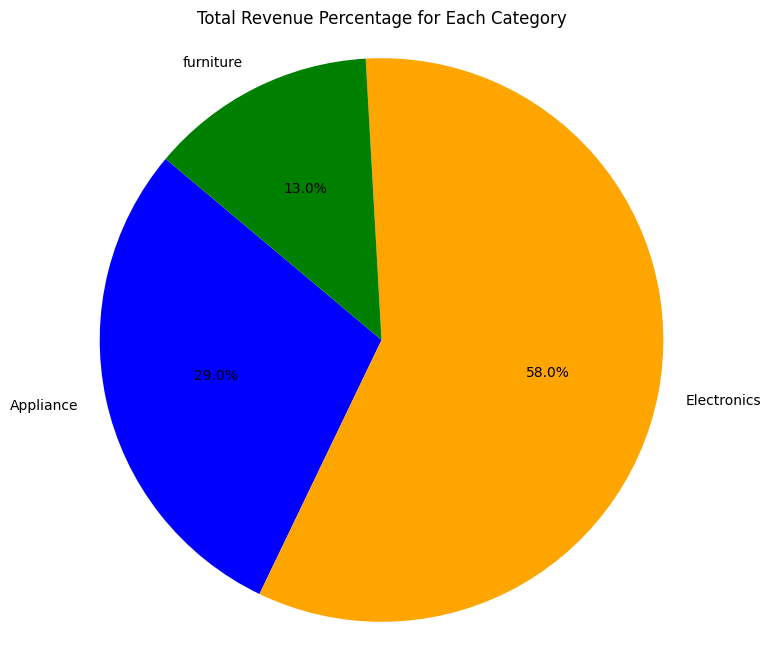

In [13]:
# ○ Calculate total revenue product category wise percentage.
revenue_data = pd.merge(order_data, product_data[['product_id', 'selling_price', 'category']], on='product_id')
revenue_data['total_revenue'] = revenue_data['quantity'] * revenue_data['selling_price']

category_revenue = revenue_data.groupby('category')['total_revenue'].sum().reset_index()

labels = category_revenue['category']
sizes = category_revenue['total_revenue']

colors = ['blue', 'orange', 'green', 'red'][:len(labels)]  # Adjust colors based on the number of categories

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Total Revenue Percentage for Each Category')
plt.show()


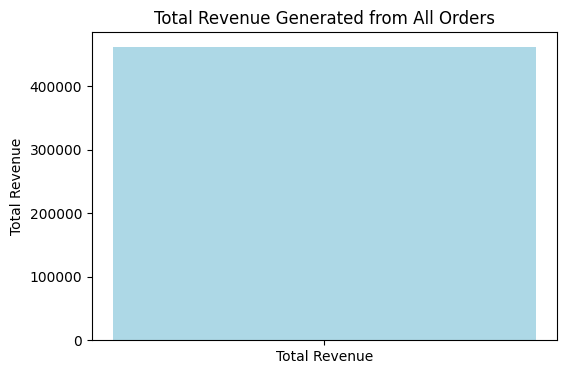

In [14]:
# ○ Calculate the total revenue generated from all orders

revenue_data = pd.merge(order_data, product_data[['product_id', 'selling_price']], on='product_id')
revenue_data['total_revenue'] = revenue_data['quantity'] * revenue_data['selling_price']

total_revenue = revenue_data['total_revenue'].sum()

revenue = [total_revenue]  
labels = ['Total Revenue']

plt.figure(figsize=(6, 4))
plt.bar(labels, revenue, color='lightblue')
plt.title('Total Revenue Generated from All Orders')
plt.ylabel('Total Revenue')
plt.ticklabel_format(style='plain', axis='y') 


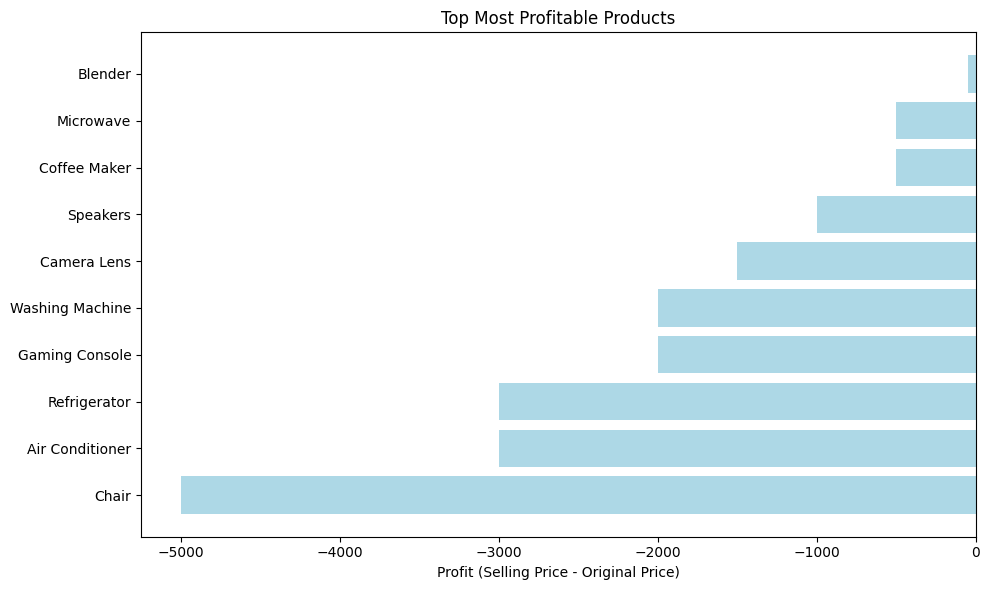

In [15]:
#○ Identify the most profitable products based on the difference between original and selling prices.

product_data['profit'] = product_data['selling_price'] - product_data['original_price']

top_profit_products = product_data.nlargest(10, 'profit')[['product_name', 'profit']]

plt.figure(figsize=(10, 6))
plt.barh(top_profit_products['product_name'][::-1], top_profit_products['profit'][::-1], color='lightblue')  # Reversing to match the image layout

plt.xlabel('Profit (Selling Price - Original Price)')
plt.title('Top Most Profitable Products')
plt.tight_layout()  
plt.show()


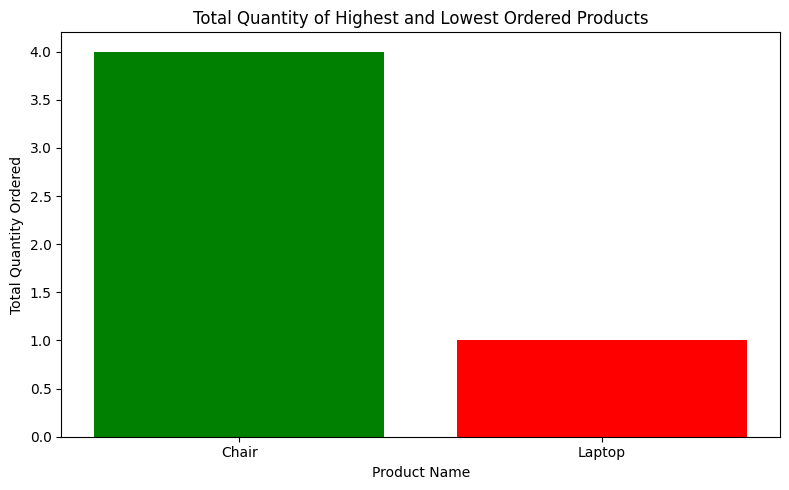

In [16]:
# ● Customer Order Patterns:
# ○ Identify product names with the highest and lowest order quantities.

quantity_per_product = order_data.groupby('product_id')['quantity'].sum().reset_index()

merged_data = pd.merge(quantity_per_product, product_data[['product_id', 'product_name']], on='product_id')

highest_ordered = merged_data.nlargest(1, 'quantity')
lowest_ordered = merged_data.nsmallest(1, 'quantity')

products = [highest_ordered['product_name'].values[0], lowest_ordered['product_name'].values[0]]
quantities = [highest_ordered['quantity'].values[0], lowest_ordered['quantity'].values[0]]

plt.figure(figsize=(8, 5))
plt.bar(products, quantities, color=['green', 'red'])
plt.title('Total Quantity of Highest and Lowest Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.tight_layout()
plt.show()


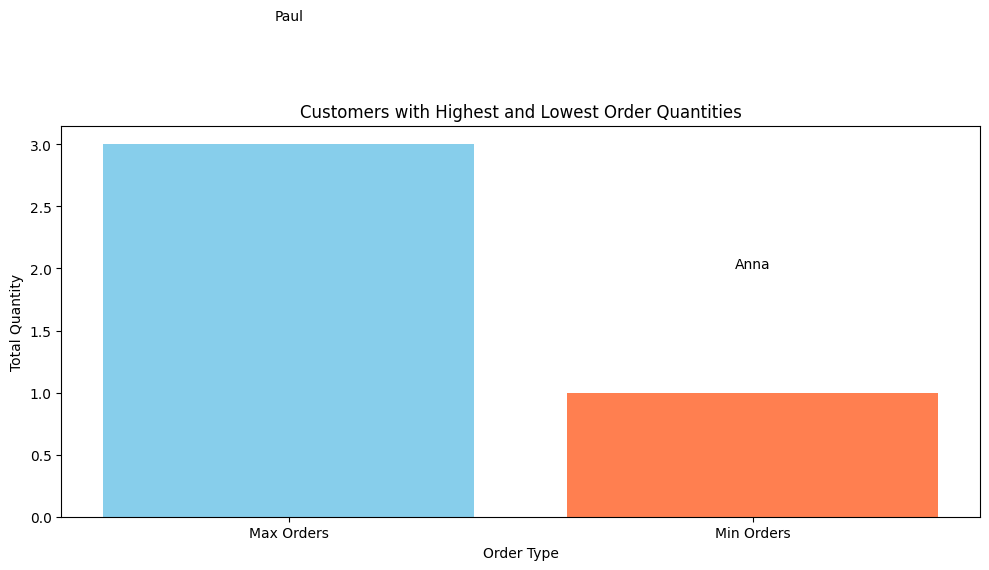

In [17]:
#○ Identify customers with the highest and lowest order quantities by customer name

merged_data = pd.merge(order_data, customer_data, on='customer_id')
customer_totals = merged_data.groupby('name')['quantity'].sum().reset_index()

max_order_customer = customer_totals.loc[customer_totals['quantity'].idxmax()]
min_order_customer = customer_totals.loc[customer_totals['quantity'].idxmin()]

plt.figure(figsize=(10, 6))
plt.bar(['Max Orders', 'Min Orders'], 
        [max_order_customer['quantity'], min_order_customer['quantity']], 
        color=['skyblue', 'coral'])

plt.title('Customers with Highest and Lowest Order Quantities')
plt.xlabel('Order Type')
plt.ylabel('Total Quantity')

plt.text(0, max_order_customer['quantity'] + 1, max_order_customer['name'], ha='center')
plt.text(1, min_order_customer['quantity'] + 1, min_order_customer['name'], ha='center')

plt.tight_layout()
plt.show()



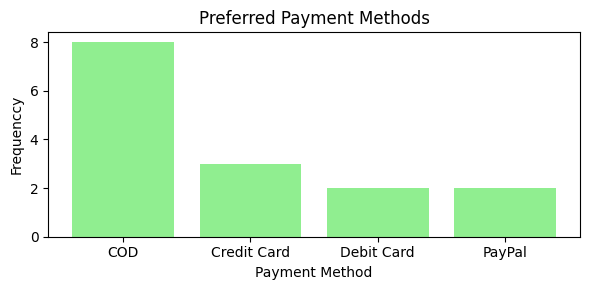

In [18]:
#  Determine the most preferred payment modes
payment_mode_distribution = order_data['payment_mode'].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(payment_mode_distribution.index, payment_mode_distribution.values, color='lightgreen')

plt.title('Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequenccy')
plt.tight_layout()
plt.show()


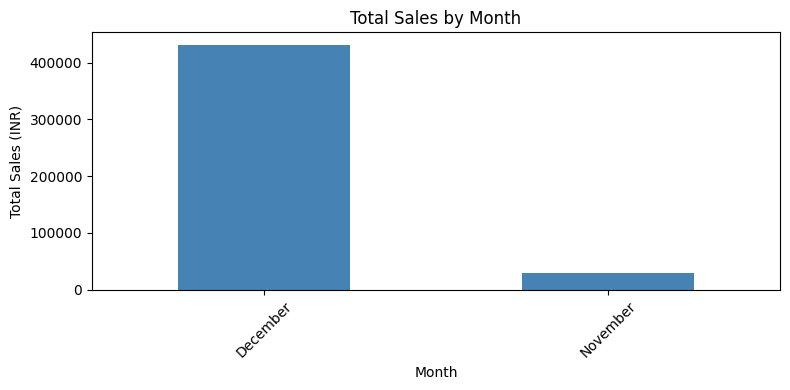

In [19]:
# Time-based Analysis:
#     -> Month wise total sales
order_data['month'] = order_data['order_date'].dt.strftime('%B')  # Extract month names
# -> # Converting 'order_date' to datetime format
#order_data['order_date'] = pd.to_datetime(order_data['order_date'])
# ->Extracting the month and year as a new column
#order_data['month'] = order_data['order_date'].dt.to_period('M')

monthly_sales = order_data.groupby('month')['total_price'].sum()
plt.figure(figsize=(8,4))

monthly_sales.plot(kind='bar', color='steelblue')

plt.title('Total Sales by Month')
plt.ylabel('Total Sales (INR)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

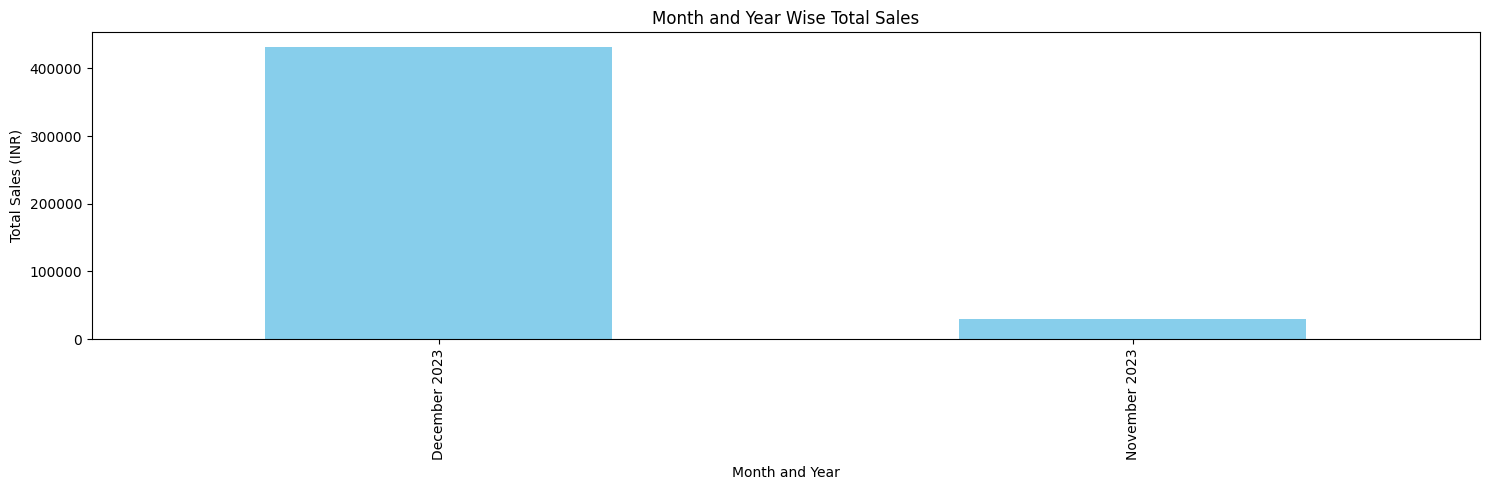

In [20]:
# ->Month and year wise total sales
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
order_data['month_year'] = order_data['order_date'].dt.strftime('%B %Y')

monthly_sales = order_data.groupby('month_year')['total_price'].sum()

plt.figure(figsize=(15, 5))  
monthly_sales.plot(kind='bar', color='skyblue')  
plt.title('Month and Year Wise Total Sales')
plt.ylabel('Total Sales (INR)')
plt.xlabel('Month and Year') 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


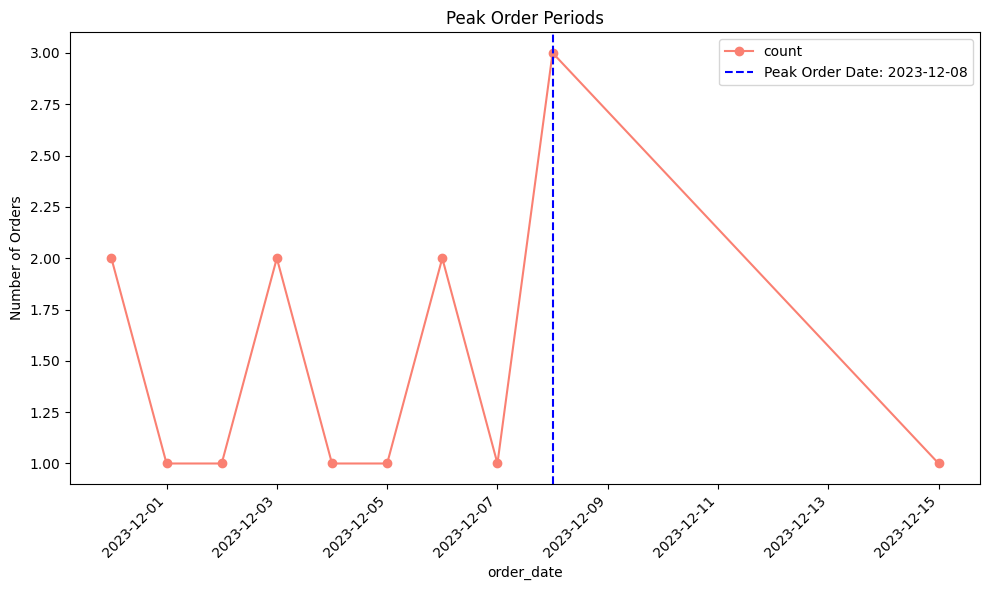

In [21]:
# ○ Identify peak order date.

order_data['order_date'] = pd.to_datetime(order_data['order_date'])
peak_order_date = order_data['order_date'].value_counts().idxmax()

plt.figure(figsize=(10, 6))
order_data['order_date'].value_counts().sort_index().plot(kind='line', marker='o', color='salmon')
plt.axvline(x=peak_order_date, color='blue', linestyle='--', label=f'Peak Order Date: {peak_order_date.date()}')
plt.title('Peak Order Periods')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Customer Distribution Across Different Cities:
                City  Number of Customers
0              Tokyo                    2
1             Sydney                    1
2           Kanagawa                    1
3   Lake Buena Vista                    1
4           New York                    1
5             London                    1
6              Paris                    1
7             Berlin                    1
8               Rome                    1
9      San Francisco                    1
10             Dubai                    1
11         Singapore                    1
12         Melbourne                    1
13            Mumbai                    1


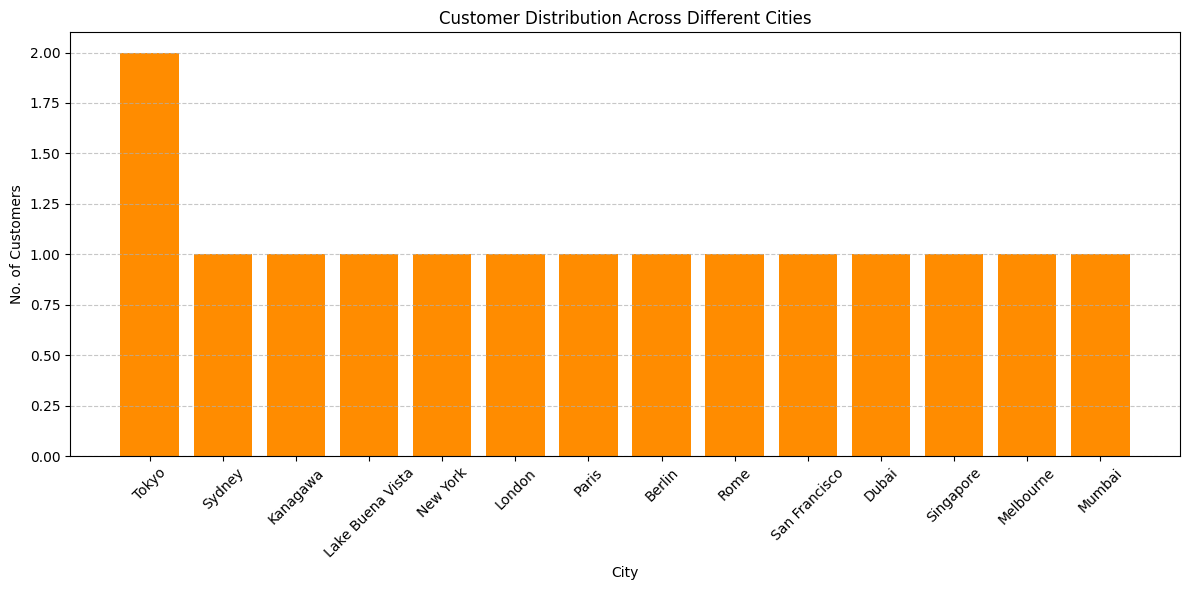

In [22]:
# ● Geographical Analysis:
# ○ Explore the distribution of customers across different cities

city_customer_distribution = customer_data['city'].value_counts().reset_index()

city_customer_distribution.columns = ['City', 'Number of Customers']

print("Customer Distribution Across Different Cities:")
print(city_customer_distribution)

plt.figure(figsize=(12, 6))
plt.bar(city_customer_distribution['City'], city_customer_distribution['Number of Customers'], color='darkorange')
plt.title('Customer Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('No. of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

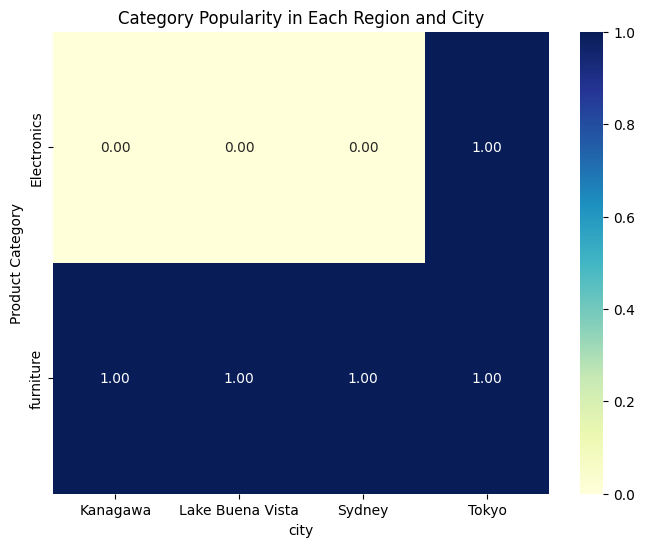

In [23]:
# ○ Analyze whether certain products or categories are more popular in a specific city.

merged_data = pd.merge(order_data, product_data, on='product_id')

customer_city_mapping = {
    'C1001': 'Tokyo',
    'C1002': 'Sydney',
    'C1003': 'Kanagawa',
    'C1004': 'Tokyo',
    'C1005': 'Lake Buena Vista'
}

merged_data['city'] = merged_data['customer_id'].map(customer_city_mapping)

heatmap_data = merged_data.pivot_table(index='category', columns='city', values='quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Category Popularity in Each Region and City')
plt.ylabel('Product Category')
plt.xlabel

Best-Selling Products:
       product_name  quantity
3             Chair       4.0
1           Blender       3.0
2       Camera Lens       2.0
8        Smartphone       2.0
11  Washing Machine       2.0
0   Air Conditioner       1.0
4            Laptop       1.0
5         Laptop HP       1.0
6         Microwave       1.0
7      Refrigerator       1.0
9          Speakers       1.0
10               TV       1.0


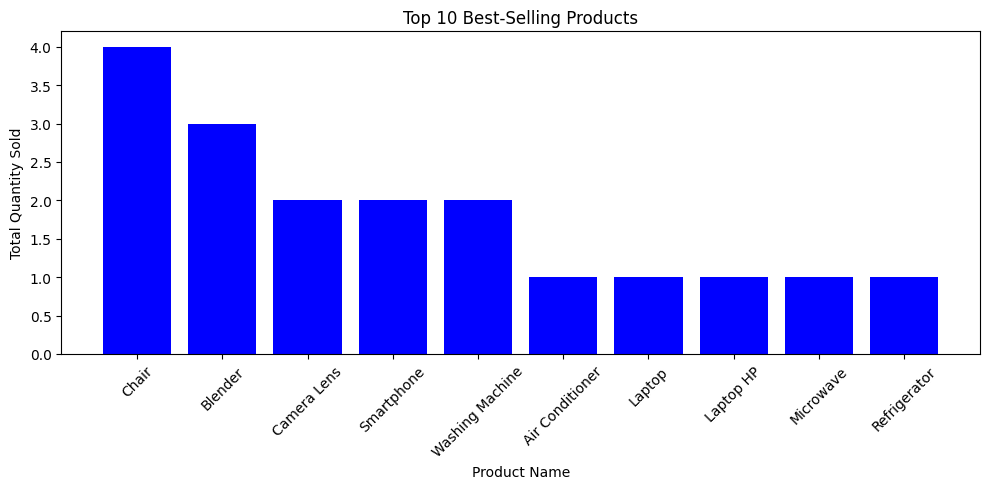

In [24]:
# ● Product Performance:
# ○ Identify the best-selling products.

merged_data = order_data.merge(customer_data, on='customer_id').merge(product_data, on='product_id')

best_selling_products = merged_data.groupby('product_name')['quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by='quantity', ascending=False)

print("Best-Selling Products:")
print(best_selling_products)

plt.figure(figsize=(10, 5))
plt.bar(best_selling_products['product_name'][:10], best_selling_products['quantity'][:10], color='blue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Best-Selling Products:
       product_name  quantity
3             Chair       4.0
1           Blender       3.0
2       Camera Lens       2.0
8        Smartphone       2.0
11  Washing Machine       2.0
0   Air Conditioner       1.0
4            Laptop       1.0
5         Laptop HP       1.0
6         Microwave       1.0
7      Refrigerator       1.0
9          Speakers       1.0
10               TV       1.0


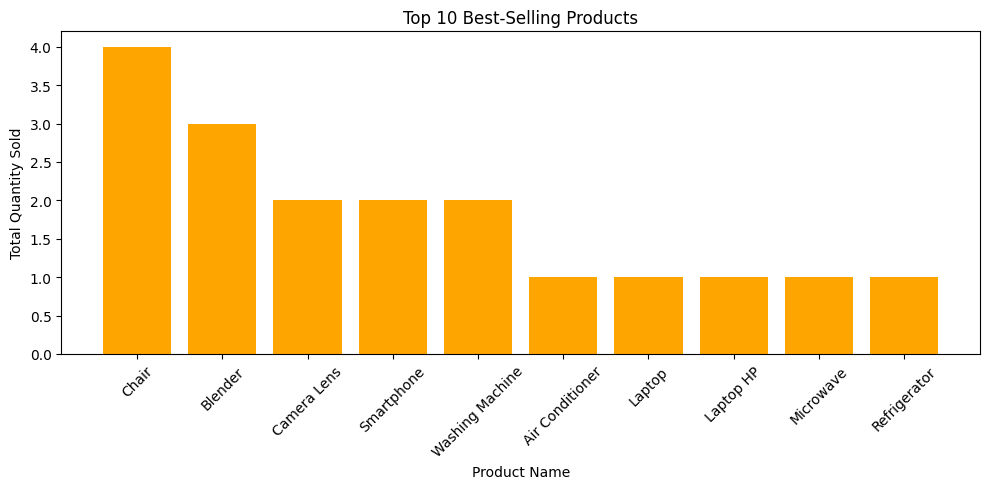

In [25]:
# ● Product Performance:
# ○ Identify the best-selling products.


merged_data = order_data.merge(customer_data, on='customer_id')
merged_data = merged_data.merge(product_data, on='product_id')

best_selling_products = merged_data.groupby('product_name')['quantity'].sum().reset_index()

best_selling_products = best_selling_products.sort_values(by='quantity', ascending=False)

print("Best-Selling Products:")
print(best_selling_products)

plt.figure(figsize=(10, 5))
plt.bar(best_selling_products['product_name'][:10], best_selling_products['quantity'][:10], color='orange')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Slow-Moving Products:
       product_name  quantity
0   Air Conditioner       1.0
4            Laptop       1.0
5         Laptop HP       1.0
6         Microwave       1.0
7      Refrigerator       1.0
9          Speakers       1.0
10               TV       1.0
2       Camera Lens       2.0
8        Smartphone       2.0
11  Washing Machine       2.0


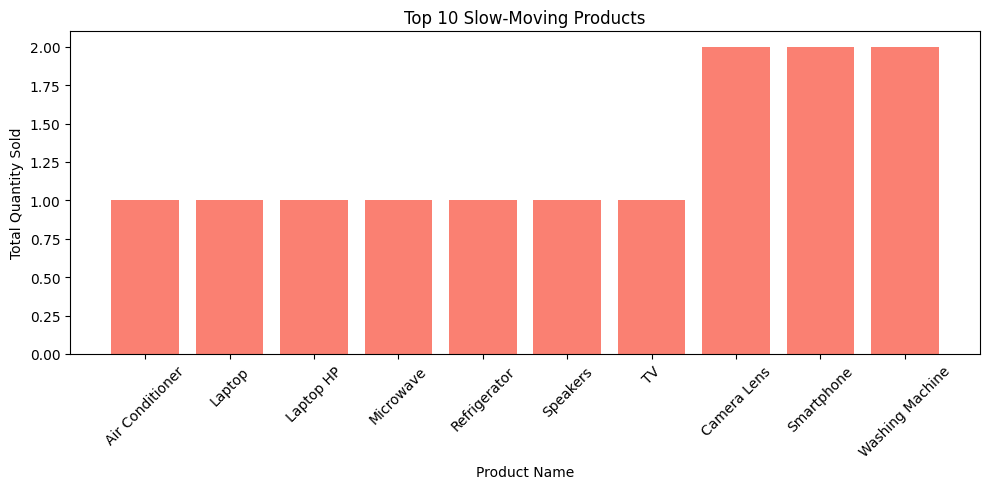

In [26]:
# ○ Identify top 10 slow-moving products based on low sales
combined_data = order_data.merge(customer_data, on='customer_id').merge(product_data, on='product_id')

slow_moving_products = combined_data.groupby('product_name')['quantity'].sum().reset_index()

slow_moving_products = slow_moving_products.sort_values(by='quantity')

top_slow_moving_products = slow_moving_products.head(10)

print("Top 10 Slow-Moving Products:")
print(top_slow_moving_products)

plt.figure(figsize=(10, 5))
plt.bar(top_slow_moving_products['product_name'], top_slow_moving_products['quantity'], color='salmon')
plt.title('Top 10 Slow-Moving Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
# ● Payment Analysis:
# ○ Display successful and pending payments order counts

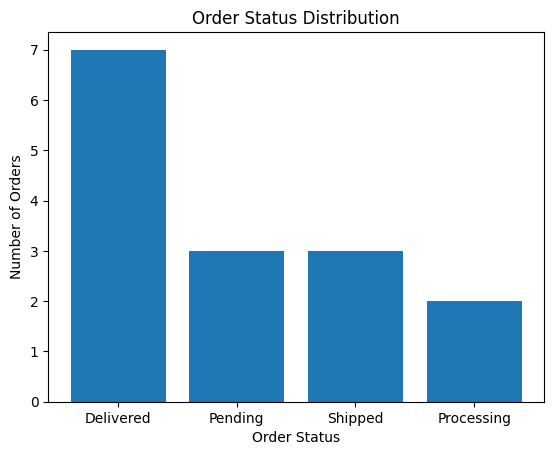

In [28]:
payment_status_count = order_data['order_status'].value_counts()

order_status = payment_status_count.index
number_of_orders = payment_status_count.values
plt.bar(order_status, number_of_orders)
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.show()
